In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install opencv-python matplotlib imageio gdown tensorflow

In [ ]:
import os
import cv2
import tensorflow as tf
import numpy as np
from typing import List
from matplotlib import pyplot as plt
import imageio

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass

In [ ]:
import gdown

In [ ]:
url = 'https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL'
output = 'data.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('data.zip')

Downloading...
From (original): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL
From (redirected): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL&confirm=t&uuid=f6c46fe4-1fb5-4276-acc2-a9471d347d71
To: /content/data.zip
100%|██████████| 423M/423M [00:08<00:00, 52.2MB/s]


['data/',
 'data/alignments/',
 'data/alignments/s1/',
 'data/alignments/s1/bbaf2n.align',
 'data/alignments/s1/bbaf3s.align',
 'data/alignments/s1/bbaf4p.align',
 'data/alignments/s1/bbaf5a.align',
 'data/alignments/s1/bbal6n.align',
 'data/alignments/s1/bbal7s.align',
 'data/alignments/s1/bbal8p.align',
 'data/alignments/s1/bbal9a.align',
 'data/alignments/s1/bbas1s.align',
 'data/alignments/s1/bbas2p.align',
 'data/alignments/s1/bbas3a.align',
 'data/alignments/s1/bbaszn.align',
 'data/alignments/s1/bbaz4n.align',
 'data/alignments/s1/bbaz5s.align',
 'data/alignments/s1/bbaz6p.align',
 'data/alignments/s1/bbaz7a.align',
 'data/alignments/s1/bbbf6n.align',
 'data/alignments/s1/bbbf7s.align',
 'data/alignments/s1/bbbf8p.align',
 'data/alignments/s1/bbbf9a.align',
 'data/alignments/s1/bbbm1s.align',
 'data/alignments/s1/bbbm2p.align',
 'data/alignments/s1/bbbm3a.align',
 'data/alignments/s1/bbbmzn.align',
 'data/alignments/s1/bbbs4n.align',
 'data/alignments/s1/bbbs5s.align',
 'data/al

In [ ]:
def load_video(path:str) -> List[float]:

    cap = cv2.VideoCapture(path)
    frames = []
    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
        ret, frame = cap.read()
        frame = tf.image.rgb_to_grayscale(frame)
        frames.append(frame[190:236,80:220,:])
    cap.release()

    mean = tf.math.reduce_mean(frames)
    std = tf.math.reduce_std(tf.cast(frames, tf.float32))
    return tf.cast((frames - mean), tf.float32) / std

In [ ]:
vocab = [x for x in "abcdefghijklmnopqrstuvwxyz'?!123456789 "]

In [ ]:
char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="")
num_to_char = tf.keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)

print(
    f"The vocabulary is: {char_to_num.get_vocabulary()} "
    f"(size ={char_to_num.vocabulary_size()})"
)

The vocabulary is: ['', np.str_('a'), np.str_('b'), np.str_('c'), np.str_('d'), np.str_('e'), np.str_('f'), np.str_('g'), np.str_('h'), np.str_('i'), np.str_('j'), np.str_('k'), np.str_('l'), np.str_('m'), np.str_('n'), np.str_('o'), np.str_('p'), np.str_('q'), np.str_('r'), np.str_('s'), np.str_('t'), np.str_('u'), np.str_('v'), np.str_('w'), np.str_('x'), np.str_('y'), np.str_('z'), np.str_("'"), np.str_('?'), np.str_('!'), np.str_('1'), np.str_('2'), np.str_('3'), np.str_('4'), np.str_('5'), np.str_('6'), np.str_('7'), np.str_('8'), np.str_('9'), np.str_(' ')] (size =40)


In [ ]:
char_to_num.get_vocabulary()

['',
 np.str_('a'),
 np.str_('b'),
 np.str_('c'),
 np.str_('d'),
 np.str_('e'),
 np.str_('f'),
 np.str_('g'),
 np.str_('h'),
 np.str_('i'),
 np.str_('j'),
 np.str_('k'),
 np.str_('l'),
 np.str_('m'),
 np.str_('n'),
 np.str_('o'),
 np.str_('p'),
 np.str_('q'),
 np.str_('r'),
 np.str_('s'),
 np.str_('t'),
 np.str_('u'),
 np.str_('v'),
 np.str_('w'),
 np.str_('x'),
 np.str_('y'),
 np.str_('z'),
 np.str_("'"),
 np.str_('?'),
 np.str_('!'),
 np.str_('1'),
 np.str_('2'),
 np.str_('3'),
 np.str_('4'),
 np.str_('5'),
 np.str_('6'),
 np.str_('7'),
 np.str_('8'),
 np.str_('9'),
 np.str_(' ')]

In [ ]:
char_to_num(['n','i','c','k'])

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([14,  9,  3, 11])>

In [ ]:
num_to_char([14,  9,  3, 11])

<tf.Tensor: shape=(4,), dtype=string, numpy=array([b'n', b'i', b'c', b'k'], dtype=object)>

In [ ]:
def load_alignments(path:str) -> List[str]:
    with open(path, 'r') as f:
        lines = f.readlines()
    tokens = []
    for line in lines:
        line = line.split()
        if line[2] != 'sil':
            tokens = [*tokens,' ',line[2]]
    return char_to_num(tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'), (-1)))[1:]

In [ ]:
def load_data(path: str):
    path = bytes.decode(path.numpy())
    #file_name = path.split('/')[-1].split('.')[0]
    # File name splitting for windows
    # Portable filename extraction
    file_name = os.path.basename(path).split('.')[0]

    video_path = os.path.join('data', 's1', f'{file_name}.mpg')
    alignment_path = os.path.join('data', 'alignments', 's1', f'{file_name}.align')

    frames = load_video(video_path)
    alignments = load_alignments(alignment_path)

    return frames, alignments

In [ ]:
test_path = './/data//s1//bbal6n.mpg'

In [ ]:
tf.convert_to_tensor(test_path).numpy().decode('utf-8').split('//')[-1].split('.')[0]

'bbal6n'

In [ ]:
frames, alignments = load_data(tf.convert_to_tensor(test_path))

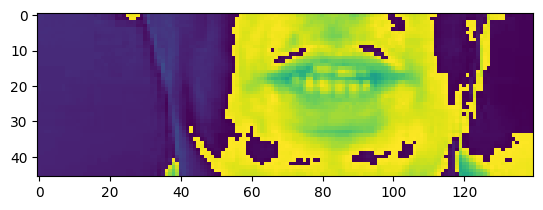

In [ ]:
plt.imshow(frames[40])

In [ ]:
alignments

<tf.Tensor: shape=(21,), dtype=int64, numpy=
array([ 2,  9, 14, 39,  2, 12, 21,  5, 39,  1, 20, 39, 12, 39, 19,  9, 24,
       39, 14, 15, 23])>

In [ ]:
tf.strings.reduce_join([bytes.decode(x) for x in num_to_char(alignments.numpy()).numpy()])

<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at l six now'>

In [ ]:
def mappable_function(path:str) ->List[str]:
    result = tf.py_function(load_data, [path], (tf.float32, tf.int64))
    return result

In [ ]:
#Data Pipeline

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
data = tf.data.Dataset.list_files('./data/s1/*.mpg')
data = data.shuffle(500, reshuffle_each_iteration=False)
data = data.map(mappable_function)
data = data.padded_batch(2, padded_shapes=([75,None,None,None],[40]))
data = data.prefetch(tf.data.AUTOTUNE)
# Added for split
train = data.take(450)
test = data.skip(450)

In [ ]:
len(test)

50

In [ ]:
frames, alignments = data.as_numpy_iterator().next()

In [ ]:
len(frames)

2

In [ ]:
sample = data.as_numpy_iterator()

In [ ]:
val = sample.next(); val[0]

array([[[[[ 1.6803839 ],
          [ 1.4894313 ],
          [ 1.4512407 ],
          ...,
          [ 0.3437149 ],
          [ 0.30552435],
          [ 0.30552435]],

         [[ 1.6803839 ],
          [ 1.6040028 ],
          [ 1.4512407 ],
          ...,
          [ 0.3437149 ],
          [ 0.30552435],
          [ 0.30552435]],

         [[ 1.5658123 ],
          [ 1.5658123 ],
          [ 1.5276217 ],
          ...,
          [ 0.3437149 ],
          [ 0.30552435],
          [ 0.30552435]],

         ...,

         [[ 1.0311447 ],
          [ 1.0311447 ],
          [ 1.0311447 ],
          ...,
          [ 0.03819054],
          [ 0.03819054],
          [ 0.03819054]],

         [[ 1.0311447 ],
          [ 1.0311447 ],
          [ 1.0311447 ],
          ...,
          [ 0.03819054],
          [ 0.03819054],
          [ 0.03819054]],

         [[ 1.0311447 ],
          [ 1.0311447 ],
          [ 1.0311447 ],
          ...,
          [ 0.03819054],
          [ 0.03819054],
          

In [ ]:
imageio.mimsave('./animation.gif', val[0][0], fps=10)

TypeError: Cannot handle this data type: (1, 1, 1), <f4

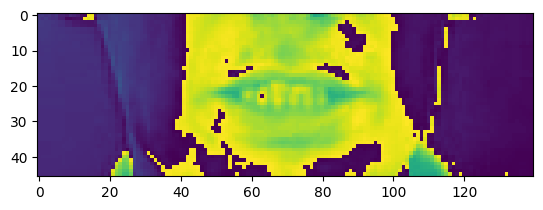

In [ ]:
# 0:videos, 0: 1st video out of the batch,  0: return the first frame in the video
plt.imshow(val[0][0][35])

In [ ]:
tf.strings.reduce_join([num_to_char(word) for word in val[1][0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'place green by k seven soon'>

In [ ]:
#Neural Network Architecture

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [ ]:
data.as_numpy_iterator().next()[0][0].shape

(75, 46, 140, 1)

In [ ]:
model = Sequential()
model.add(Conv3D(128, 3, input_shape=(75,46,140,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(256, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(75, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Reshape((75, 6375)))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Dense(char_to_num.vocabulary_size()+1, kernel_initializer='he_normal', activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv3d (Conv3D)                 │ (None, 75, 46, 140,    │         3,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 75, 46, 140,    │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d (MaxPooling3D)    │ (None, 75, 23, 70,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_1 (Conv3D)               │ (None, 75, 23, 70,     │       884,992 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 75, 23, 70,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_1 (MaxPooling3D)  │ (None, 75, 11, 35,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_2 (Conv3D)               │ (None, 75, 11, 35, 75) │       518,475 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 75, 11, 35, 75) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_2 (MaxPooling3D)  │ (None, 75, 5, 17, 75)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 75, 6375)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 75, 256)        │     6,660,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 75, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 75, 256)        │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 75, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 75, 41)         │        10,537 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,471,924 (32.32 MB)

 Trainable params: 8,471,924 (32.32 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
5*17*75

6375

In [ ]:
yhat = model.predict(val[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


In [ ]:
tf.strings.reduce_join([num_to_char(x) for x in tf.argmax(yhat[0],axis=1)])

<tf.Tensor: shape=(), dtype=string, numpy=b'5555nnnnxxxxxxxxxxxuxxxxxxxxxxxuuuuuuuxxxxxxxxxxxxxxxxxxxxxxxxxxuuuxxxxxxxx'>

In [ ]:
tf.strings.reduce_join([num_to_char(tf.argmax(x)) for x in yhat[0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'5555nnnnxxxxxxxxxxxuxxxxxxxxxxxuuuuuuuxxxxxxxxxxxxxxxxxxxxxxxxxxuuuxxxxxxxx'>

In [ ]:
model.input_shape

(None, 75, 46, 140, 1)

In [ ]:
model.output_shape

(None, 75, 41)

In [ ]:
#Model Training

In [ ]:
import editdistance
import csv

In [ ]:
def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return float(lr * tf.math.exp(-0.1))

In [ ]:
def CTCLoss(y_true, y_pred):
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    loss = tf.keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss

In [ ]:
class MetricsCallback(tf.keras.callbacks.Callback):
    def __init__(self, train_dataset, test_dataset, log_file, total_epochs):
        super().__init__()
        self.train_dataset = train_dataset
        self.test_dataset = test_dataset
        self.log_file = log_file
        self.total_epochs = total_epochs  # Total epochs (e.g., 100)
        with open(self.log_file, 'w', newline='') as f:
            writer = csv.writer(f)
            writer.writerow(['Epoch', 'Train CER', 'Train Seq Acc', 'Test CER', 'Test Seq Acc'])

    def compute_metrics(self, dataset_iterator):
        cer_total = 0
        seq_acc_total = 0
        num_samples = 0
        try:
            for data in dataset_iterator:
                yhat = self.model.predict(data[0], verbose=0)
                batch_size = tf.shape(yhat)[0].numpy()
                if batch_size == 0:
                    print("Warning: Empty batch encountered, skipping")
                    continue
                input_length = [75] * batch_size
                decoded = tf.keras.backend.ctc_decode(yhat, input_length=input_length, greedy=True)[0][0].numpy()
                if data[1].shape[0] != batch_size:
                    print(f"Warning: Mismatch in batch sizes - yhat: {batch_size}, labels: {data[1].shape[0]}")
                    continue
                for x in range(batch_size):
                    true_seq = ''.join([num_to_char(word).numpy().decode('utf-8') for word in data[1][x] if word != -1])
                    pred_seq = ''.join([num_to_char(word).numpy().decode('utf-8') for word in decoded[x] if word != -1])
                    cer_total += editdistance.eval(true_seq, pred_seq) / max(len(true_seq), 1)
                    seq_acc_total += 1 if true_seq == pred_seq else 0
                    num_samples += 1
        except Exception as e:
            print(f"Error in compute_metrics: {e}")
            return 0, 0
        return cer_total / max(num_samples, 1), seq_acc_total / max(num_samples, 1)

    def on_epoch_end(self, epoch, logs=None):
        # Only compute metrics at the last epoch
        if epoch + 1 == self.total_epochs:
            train_iterator = self.train_dataset.as_numpy_iterator()
            test_iterator = self.test_dataset.as_numpy_iterator()
            train_cer, train_seq_acc = self.compute_metrics(train_iterator)
            test_cer, test_seq_acc = self.compute_metrics(test_iterator)
            print(f"Final Epoch {epoch + 1}: Train CER: {train_cer:.4f}, Train Seq Acc: {train_seq_acc:.4f}")
            print(f"Final Epoch {epoch + 1}: Test CER: {test_cer:.4f}, Test Seq Acc: {test_seq_acc:.4f}")
            with open(self.log_file, 'a', newline='') as f:
                writer = csv.writer(f)
                writer.writerow([epoch + 1, train_cer, train_seq_acc, test_cer, test_seq_acc])

In [ ]:
class PeriodicCheckpoint(tf.keras.callbacks.Callback):
    def __init__(self, filepath, every_n_epochs=1):
        super(PeriodicCheckpoint, self).__init__()
        self.filepath = filepath
        self.every_n_epochs = every_n_epochs

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n_epochs == 0:
            filepath = self.filepath.format(epoch=epoch + 1)
            self.model.save_weights(filepath)
            print(f"Saved checkpoint at epoch {epoch + 1} to {filepath}")

In [ ]:
checkpoint_path = '/content/drive/MyDrive/models/checks/checkpoint_epoch_{epoch:04d}.weights.h5'

In [ ]:
metrics_log_path = '/content/drive/MyDrive/models/metrics_log.csv'

In [ ]:
class ProduceExample(tf.keras.callbacks.Callback):
    def __init__(self, dataset) -> None:
        self.dataset = dataset.as_numpy_iterator()

    def on_epoch_end(self, epoch, logs=None) -> None:
        data = self.dataset.next()
        yhat = self.model.predict(data[0])
        decoded = tf.keras.backend.ctc_decode(yhat, [75,75], greedy=False)[0][0].numpy()
        for x in range(len(yhat)):
            print('Original:', tf.strings.reduce_join(num_to_char(data[1][x])).numpy().decode('utf-8'))
            print('Prediction:', tf.strings.reduce_join(num_to_char(decoded[x])).numpy().decode('utf-8'))
            print('~'*100)

In [ ]:
total_epochs = 100

In [ ]:
checkpoint_callback = PeriodicCheckpoint(checkpoint_path, every_n_epochs=1)

In [ ]:
schedule_callback = LearningRateScheduler(scheduler)

In [ ]:
example_callback = ProduceExample(test)

In [ ]:
metrics_callback = MetricsCallback(train, test, metrics_log_path, total_epochs)

In [ ]:
import glob
checkpoint_dir = '/content/drive/MyDrive/models/checks'
checkpoints = glob.glob(os.path.join(checkpoint_dir, 'checkpoint_epoch_*.weights.h5'))
if checkpoints:
    latest_checkpoint = max(checkpoints, key=os.path.getctime)
    initial_epoch = int(latest_checkpoint.split('_')[-1].split('.')[0])
    print(f"Loading weights from {latest_checkpoint}, resuming from epoch {initial_epoch}")
    model.load_weights(latest_checkpoint)
else:
    initial_epoch = 0
    print("No checkpoint found, starting from epoch 0")

model.compile(optimizer=Adam(learning_rate=0.0001), loss=CTCLoss)

Loading weights from /content/drive/MyDrive/models/checks/checkpoint_epoch_0099.weights.h5, resuming from epoch 99


In [ ]:
model.fit(train, validation_data=test, epochs=100,initial_epoch=initial_epoch, callbacks=[checkpoint_callback, schedule_callback, example_callback, metrics_callback])

Epoch 100/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 1.0484Saved checkpoint at epoch 100 to /content/drive/MyDrive/models/checks/checkpoint_epoch_0100.weights.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 831ms/step
Original: bin red with g six now
Prediction: bin red with g six now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: lay blue in q zero now
Prediction: lay blue in q zero now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Final Epoch 100: Train CER: 0.0009, Train Seq Acc: 0.9789
Final Epoch 100: Test CER: 0.0008, Test Seq Acc: 0.9800
450/450 ━━━━━━━━━━━━━━━━━━━━ 1622s 4s/step - loss: 1.0487 - val_loss: 0.2570 - learning_rate: 9.0484e-05


In [ ]:
#Predictions

In [ ]:
url = 'https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y'
output = 'checkpoints.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('checkpoints.zip', 'models')

In [ ]:
model.load_weights('models/checkpoint')

In [ ]:
test_data = test.as_numpy_iterator()

In [ ]:
sample = test_data.next()

In [ ]:
yhat = model.predict(sample[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


In [ ]:
print('~'*100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in sample[1]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin white with u one soon'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'lay white at r seven soon'>]

In [ ]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75,75], greedy=True)[0][0].numpy()

In [ ]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin white with u one soon'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'lay white at r seven soon'>]